In [194]:
"""
Author: Aditya Goel 400414715, MEST'21, McMaster University
SEP787: Machine Learning: Classification Models
Assignment 1 - Question 1
References: 
1. Dr. Jeff Fortuna's SEP 787 Lecture Notes
2. https://scikit-learn.org/
"""


"\nAuthor: Aditya Goel 400414715, MEST'21, McMaster University\nSEP787: Machine Learning: Classification Models\nAssignment 1 - Question 1\nReferences: \n1. Dr. Jeff Fortuna's SEP 787 Lecture Notes\n2. https://scikit-learn.org/\n"

**Import Libraries**

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Function to import dataset**

In [196]:
def import_dataset(file):
  df = pd.read_csv(file, delimiter = ",", header=None)
  len_df = len(df)
  class1 = df[df[2] == 1]                 #Dataset with label = 1
  class2 = df[df[2] == 0]                 #Dataset with label = 0
  X = df.iloc[:,:-1]                      #Data points
  y = df[2]                               #Labels      

  return [df, class1, class2, X, y]

# ***Prof's Method***

**Function to obtain mean subtracted data**

In [197]:
def mean_subtracted_matrix(data):
  mean = np.mean(data, axis = 0)                                                #Mean of data points
  mean_subtracted_data = data - mean                                            #Obtain mean subtracted data
  data_submatrix = mean_subtracted_data.iloc[:,:-1]                             #Extract submatrix
  return [data_submatrix, mean]

**Function to obtain the Covariance Matrix**

In [198]:
def covariance(x):
  s = np.dot(x.T,x)                                                             #Obtains Covariance Matrix
  return s

**Function to obtain FLD**

In [199]:
def obtain_fld(w, threshold):
  m = -w[0] / w[1]
  b = -threshold/ w[1]
  xx = np.linspace(-5, 10)
  yy = m*xx + b                                                                 #Obtain FLD in the form y = mx + b
  print("The slope of the FLD is: ", m)
  print("The intercept of the FLD is: ", b)
  print("The value of the threshold is: ", threshold)

  return [m,b,xx,yy]

**Function to Plot FLD**

In [200]:
def plot_fld(xx,yy):
  plt.scatter(class1[0],class1[1], c = 'b', marker = '.')
  plt.scatter(class2[0],class2[1], c = 'r', marker = '.')
  plt.plot(xx, yy, 'k-')
  plt.show()

**Function to calculate metric - Accuracy, Error and Confusion Matrix**

In [201]:
def obtain_metric(w, X, y, threshold):
  predictions = (np.sign(np.dot(w,X.T) + threshold) + 1)/2
  error = sum(predictions != y)
  accuracy = 100*(len(df)-error)/len(df)
  conf_matrix = confusion_matrix(y, predictions)
  errorIndex = np.argwhere(pd.Series.to_numpy(predictions != y))  

  return [accuracy, error, conf_matrix, errorIndex]

**Function to obtain optimum threshold**

In [202]:
def optimum_threshold(w, X, y):
  threshold_list = np.arange(-0.1, 0.1, 0.0005)
  accuracy_list = []
  
  for threshold in threshold_list:
    [accuracy, error, conf_matrix, errorIndex] = obtain_metric(w, X, y, threshold)
    accuracy_list.append(accuracy)
    
  plt.plot(threshold_list, accuracy_list)
  plt.xlabel("Threshold")
  plt.ylabel("Accuracy")
  plt.show()
  
  index = accuracy_list.index(max(accuracy_list))
  optimum_threshold = threshold_list[index]
  print("Max accuracy is: ", max(accuracy_list))
  print("Optimal threshold is: ", optimum_threshold)

  return optimum_threshold

**Function to Print Metrics**

In [203]:
def print_metric(accuracy, error, conf_matrix, errorIndex):
  print("\nThe percentage of data that is classified incorrectly is: \n", error*100/len(df))
  print("\nThe confusion matrix is: \n", conf_matrix)
  print("\nNo. of misclassified data points whose actual class is 1 is: ", conf_matrix[1][0])
  print("No. of misclassified data points whose actual class is 0 is: ", conf_matrix[0][1])
  print("\nAccuracy: ", accuracy)
  print("\nThe error Indices are: ", errorIndex.T)



# **Main Function**

Weights are: [0.0010449  0.00242462]

Results with threshold=0

The slope of the FLD is:  -0.43095530423620576
The intercept of the FLD is:  0.0
The value of the threshold is:  0


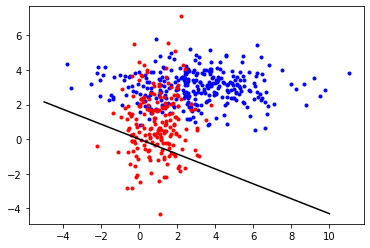


The percentage of data that is classified incorrectly is: 
 31.0

The confusion matrix is: 
 [[ 45 155]
 [  0 300]]

No. of misclassified data points whose actual class is 1 is:  0
No. of misclassified data points whose actual class is 0 is:  155

Accuracy:  69.0

The error Indices are:  [[300 302 303 304 305 306 307 308 309 310 312 313 315 316 318 319 320 321
  322 324 325 326 327 328 329 330 331 332 333 334 335 337 340 341 342 343
  346 347 348 349 351 352 353 356 357 358 359 360 361 364 366 368 369 370
  371 372 373 374 378 379 380 383 384 386 387 389 390 391 392 393 397 398
  399 400 401 402 403 404 406 407 408 410 411 412 413 415 417 418 419 420
  421 422 423 424 425 426 428 429 430 432 435 436 437 438 439 440 441 442
  444 445 447 448 449 450 451 453 454 455 457 458 459 460 461 462 463 464
  465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 481 482 484
  485 486 490 492 493 494 495 496 497 498 499]]

Calculating the optimum threshold



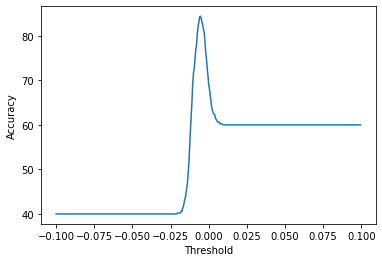

Max accuracy is:  84.4
Optimal threshold is:  -0.005499999999999922

Results with optimum threshold

The slope of the FLD is:  -0.43095530423620576
The intercept of the FLD is:  2.268395919075229
The value of the threshold is:  -0.005499999999999922


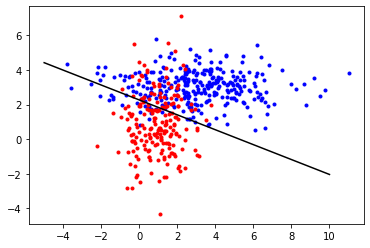


The percentage of data that is classified incorrectly is: 
 15.6

The confusion matrix is: 
 [[145  55]
 [ 23 277]]

No. of misclassified data points whose actual class is 1 is:  23
No. of misclassified data points whose actual class is 0 is:  55

Accuracy:  84.4

The error Indices are:  [[ 31  33  34  53  70  75 113 117 119 129 136 142 148 151 162 220 223 257
  261 275 276 291 296 300 304 310 315 327 330 333 337 340 346 352 353 358
  372 373 374 378 379 384 389 391 398 400 403 411 418 419 420 423 424 425
  426 428 432 436 440 444 454 455 457 458 462 465 467 468 471 473 474 478
  481 484 485 494 495 498]]


In [204]:
[df, class1, class2, X, y] = import_dataset('fld.txt')                          #Import Dataset

[x1mc, mean1] = mean_subtracted_matrix(class1)                                  #Calculate Mean subtracted data
[x2mc, mean2] = mean_subtracted_matrix(class2)

S1 = covariance(x1mc)                                                           #Calculate individual covariance matrix
S2 = covariance(x2mc)

Sw = S1+S2                                                                      #Calculate Combined Covariance matrix

w = np.dot(np.linalg.inv(Sw), (mean1 - mean2)[0:2])                             #Obtain FLD line's weights
print("Weights are:", w)

print("\nResults with threshold=0\n")
threshold = 0                                                                   #Results with threshold = 0
[m,b,xx,yy] = obtain_fld(w, threshold)
plot_fld(xx,yy)
[accuracy, error, conf_matrix, errorIndex] = obtain_metric(w, X, y, threshold)
print_metric(accuracy, error, conf_matrix, errorIndex)



print("\nCalculating the optimum threshold\n")
optimum_threshold = optimum_threshold(w,X,y)                                    #Results with optimum threshold

print("\nResults with optimum threshold\n")
[m,b,xx,yy] = obtain_fld(w, optimum_threshold)
plot_fld(xx,yy)
[accuracy, error, conf_matrix, errorIndex] = obtain_metric(w, X, y, optimum_threshold)
print_metric(accuracy, error, conf_matrix, errorIndex)



# **Sklearn Main Function**

Sklearn's weights are:  [0.5203618  1.20746117]

Results with sklearn's threshold

The slope of the FLD is:  -0.43095530423620587
The intercept of the FLD is:  2.4462316943530653
The value of the threshold is:  -2.953729794031932

The error Indices are:  [[  5  28  31  33  34  52  53  70  75  78 113 117 119 129 134 136 142 148
  151 162 209 220 223 233 257 261 275 276 291 296 300 304 310 327 330 333
  337 340 346 352 353 358 372 373 374 378 379 384 389 391 398 400 403 411
  418 419 420 423 425 428 432 436 440 454 455 457 458 462 465 467 471 473
  474 478 481 484 485 494 495 498]]

The percentage of data that is classified incorrectly is: 
 16.0

The confusion matrix is: 
 [[150  50]
 [ 30 270]]

No. of misclassified data points whose actual class is 1 is:  30
No. of misclassified data points whose actual class is 0 is:  50

Accuracy:  84.0

The error Indices are:  [[  5  28  31  33  34  52  53  70  75  78 113 117 119 129 134 136 142 148
  151 162 209 220 223 233 257 261 275 276 291 296

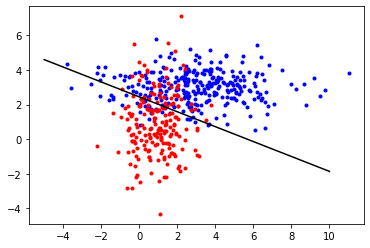

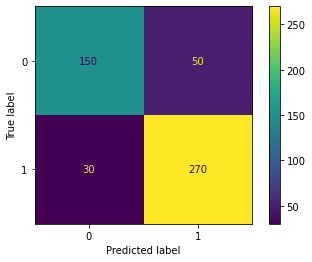

In [205]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

w = clf.coef_[0]                                                                #Returns the weights for the 2 axis (i.e w = [a b] in ax1 + bx2 + c = 0)
c = clf.intercept_[0]                                                           #Returns the threshold (i.e c in ax1 + bx2 + c = 0)
print("Sklearn's weights are: ", w)

print("\nResults with sklearn's threshold\n")
[m,b,xx,yy] = obtain_fld(w, c)                                                  #Obtain FLD

pred_y = clf.predict(X)                                                         #Obtain Metric    
accuracy = accuracy_score(y,pred_y)*100
error = (100-accuracy)*len(df)/100
conf_matrix = confusion_matrix(y, pred_y)
errorIndex = np.argwhere(pd.Series.to_numpy(pred_y != y))  
print("\nThe error Indices are: ", errorIndex.T)                                #Print incorrectly classified datapoints  
print_metric(accuracy, error, conf_matrix, errorIndex)                          #Print Metric

plot_fld(xx,yy)                                                                 #Plot Metric
plot_confusion_matrix(clf, X, y)